    L1 Cache Size  L2 Cache Size  Line Size  L1 Hits  L1 Misses  L2 Hits  \
0              32            512         32    84091     106541   105734   
1              32            512         32   165354      25278    24463   
2              32            512         32    77723     112909   112059   
3              32            512         64    81555     109077   108622   
4              32            512         64   172131      18501    18045   
5              32            512         64    83861     106771   106278   
6              32            512        128    84773     105859   105601   
7              32            512        128   175675      14957    14702   
8              32            512        128    88628     102004   101733   
9              32           1024         32    78717     111915   111091   
10             32           1024         32   165354      25278    24463   
11             32           1024         32    77723     112909   112062   
12          

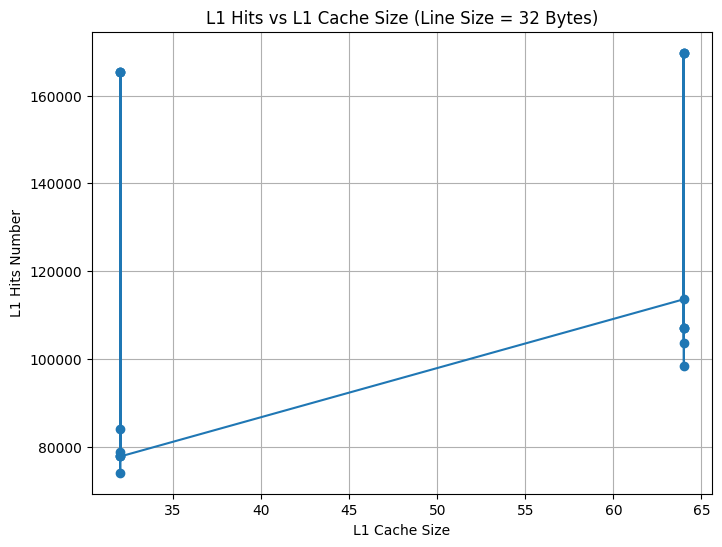

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import re
# Data provided by the user
file_path = './case2.log'
with open(file_path, 'r') as file:
    log_content = file.read()


def extract_data_to_df(log_content):
    pattern = (
        r"L1 Cache Size: (\d+) KB, L2 Cache Size: (\d+) KB, Line Size: (\d+) Bytes\n"
        r"L1 Hits: (\d+), L1 Misses: (\d+), L2 Hits: (\d+), L2 Misses: (\d+)\n"
        r"L1 Hit Rate: ([\d\.]+), L2 Hit Rate: ([\d\.]+)\n"
        r"total_time: (\d+) cycles"
    )
    extracted_rows = re.findall(pattern, log_content)
    
    columns = ['L1 Cache Size', 'L2 Cache Size', 'Line Size', 'L1 Hits', 'L1 Misses', 
               'L2 Hits', 'L2 Misses', 'L1 Hit Rate', 'L2 Hit Rate', 'Total Time']
    df = pd.DataFrame(extracted_rows, columns=columns)
    # Converting numeric columns from string to appropriate types
    df[columns] = df[columns].apply(pd.to_numeric)

    return df

file_path = 'case2.log'

# Read and process the log file
df = extract_data_to_df(log_content)
print(df)

df_32 = df[df['Line Size'] == 32]
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(df_32['L1 Cache Size'], df_32['L1 Hits'], marker='o', linestyle='-')
plt.title('L1 Hits vs L1 Cache Size (Line Size = 32 Bytes)')
plt.xlabel('L1 Cache Size')
plt.ylabel('L1 Hits Number')
plt.grid(True)
plt.show()

